In [61]:
%matplotlib inline
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np



titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [63]:
X = data[["X_1", "X_2"]] # данные которые мы используем для обучения
y = data.Y  # Данные которые мы предсказываем

clf.fit(X, y)  # Обучим наше дерево решений

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

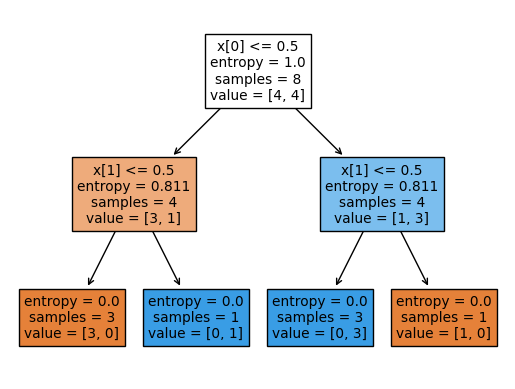

In [64]:
plot_tree(clf,filled=True)

In [65]:
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Age'], axis=1)  # Dataset bilding
X = pd.get_dummies(X, dtype=int)
y = titanic.Survived

X

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,0,0
2,3,0,0,7.9250,1,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1
4,3,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0,1,0,0,1
887,1,0,0,30.0000,1,0,0,0,1
888,3,1,2,23.4500,1,0,0,0,1
889,1,0,0,30.0000,0,1,1,0,0


In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # Разбиваем наши датасеты на группы в отношении test_size

data = []
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, x_train, y_train, cv=5).mean()
    
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    
    temp_data = (max_depth, train_score, test_score, mean_cross_val_score)
    data.append(temp_data)
    
scores_data = pd.DataFrame(data, columns=['max_depth', 'train_score', 'test_score', "mean_cross_val_score"])
scores_data.sort_values('mean_cross_val_score', ascending=False)

,max_depth,train_score,test_score,mean_cross_val_score
2,3,0.807047,0.810169,0.805350
6,7,0.860738,0.837288,0.793669
4,5,0.828859,0.796610,0.793655
3,4,0.810403,0.816949,0.793627
5,6,0.848993,0.840678,0.790294
...,...,...,...,...
79,80,0.932886,0.813559,0.755056
63,64,0.932886,0.820339,0.753403
72,73,0.932886,0.816949,0.753389
83,84,0.932886,0.806780,0.753389


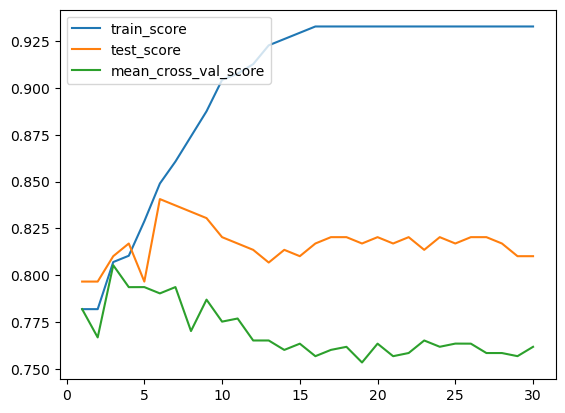

,max_depth,train_score,test_score,mean_cross_val_score
2,3,0.807047,0.810169,0.80535


In [67]:
plt.plot(scores_data.set_index(scores_data.max_depth).drop(['max_depth'],axis=1).head(30))
plt.legend([ 'train_score', 'test_score', 'mean_cross_val_score'], loc='upper left')
plt.show()
max_mean_cross_val_score = scores_data[scores_data.mean_cross_val_score == scores_data.max().mean_cross_val_score]

max_mean_cross_val_score

,max_depth,set_type,score
86,87,train_score,0.932886
74,75,train_score,0.932886
72,73,train_score,0.932886
71,72,train_score,0.932886
70,71,train_score,0.932886
...,...,...,...
251,54,mean_cross_val_score,0.755056
261,64,mean_cross_val_score,0.753403
216,19,mean_cross_val_score,0.753389
270,73,mean_cross_val_score,0.753389


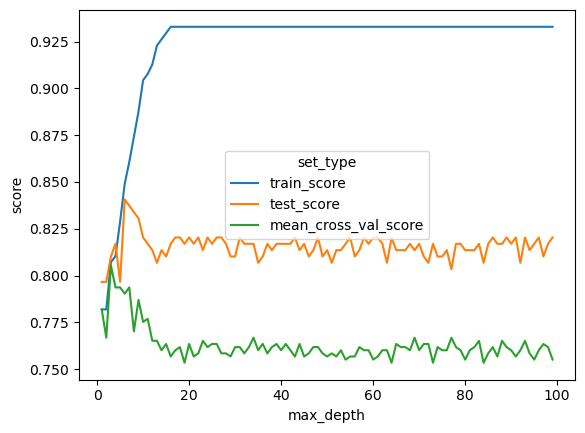

In [68]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score', "mean_cross_val_score"], var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

scores_data_long.sort_values('score', ascending=False)


In [69]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_mean_cross_val_score.iloc[0, 0])

best_clf.fit(x_train, y_train)

# Предсказание на тестовых данных с записью результатов в pd.Series с названием колонки 'Вид'
y_pred = pd.Series(best_clf.predict(x_test), name='Survived')

# Подсчет значений в предсказанных данных
print(y_pred.value_counts())

print(precision_score(y_test, best_clf.predict(x_test), average='micro'))
print(recall_score(y_test, best_clf.predict(x_test), average='micro'))
print(f1_score(y_test, best_clf.predict(x_test), average='micro'))

Survived
0    203
1     92
Name: count, dtype: int64
0.8101694915254237
0.8101694915254237
0.8101694915254237


In [70]:
clf = tree.DecisionTreeClassifier()  # Создаём объект класификатор

parameters = {"criterion": ['gini', 'entropy'], 'max_depth': range(1,30)}  # Параметры для класификатора

grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)  # Прокачиваем классификатор (создаём новый объект) и задаём степень кросс валидации

grid_search_cv_clf.fit(x_train, y_train)  # Обучаем модель

print(grid_search_cv_clf.best_params_)  # Параметры для clf с лучшим score

best_clf = grid_search_cv_clf.best_estimator_  # Выбираем clf с лучшим score

print(precision_score(y_test, best_clf.predict(x_test)))
print(recall_score(y_test, best_clf.predict(x_test)))
print(f1_score(y_test, best_clf.predict(x_test)))

{'criterion': 'entropy', 'max_depth': 3}
0.7717391304347826
0.6698113207547169
0.7171717171717171


In [71]:
predict_proba = best_clf.predict_proba(x_test)  # Вероятности отнесения к тому или иному классу в виде двумерного массива

predict_proba

array([[0.09803922, 0.90196078],
       [0.09803922, 0.90196078],
       [0.93333333, 0.06666667],
       [0.62809917, 0.37190083],
       [0.8220339 , 0.1779661 ],
       [0.8220339 , 0.1779661 ],
       [0.01538462, 0.98461538],
       [0.01538462, 0.98461538],
       [0.39759036, 0.60240964],
       [0.93333333, 0.06666667],
       [0.01538462, 0.98461538],
       [0.09803922, 0.90196078],
       [0.93650794, 0.06349206],
       [0.01538462, 0.98461538],
       [0.94117647, 0.05882353],
       [0.62809917, 0.37190083],
       [0.93650794, 0.06349206],
       [0.01538462, 0.98461538],
       [0.8220339 , 0.1779661 ],
       [0.62809917, 0.37190083],
       [0.62809917, 0.37190083],
       [0.01538462, 0.98461538],
       [0.93650794, 0.06349206],
       [0.93333333, 0.06666667],
       [0.62809917, 0.37190083],
       [0.01538462, 0.98461538],
       [0.8220339 , 0.1779661 ],
       [0.01538462, 0.98461538],
       [0.01538462, 0.98461538],
       [0.62809917, 0.37190083],
       [0.

In [91]:
n = 0.8  # Отсечка для подбора метрик

y_pred = np.where(predict_proba[:, 1] > n , 1, 0)  # Изменяем массив в соответствии с условиями

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


0.9444444444444444
0.4811320754716981
0.6375


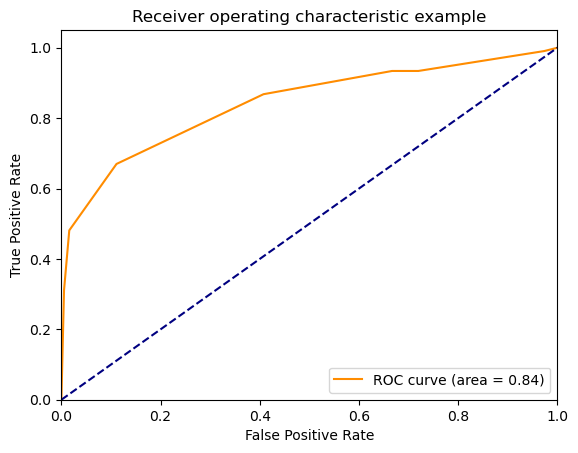

In [73]:


"""1) ROC-кривая позволяет отобразить на одном графике результаты большого числа матриц ошибок (confusion matrix) 
в зависимости от различного уровня порога отсечения бинарных классов (хотя дерево решений может использоваться и для небинарной классификации)

2) ось y - TPR(=Recall=Полнота или Чувствительность=TP/(TP+FN)), на ось x может быть выведен или FPR=1-Specificity=1-TN/(TN+FP), 
или Precision=TP/(TP+FP) - тот или иной показатель используется в зависимости от отсутствия или наличия дисбаланса классов.

3) AUC = area under the curve = интегральный показатель площади под кривой [0;1], AUC=0,5 - дерево не лучше случайного распределения"""

fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  # По сути recoll
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")
plt.show()



{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 20}

     features  feature_importances
4  Sex_female             0.305674
5    Sex_male             0.238243
3        Fare             0.171481
0      Pclass             0.146174
1       SibSp             0.053909
2       Parch             0.051873
8  Embarked_S             0.019758
6  Embarked_C             0.008932
7  Embarked_Q             0.003956

0.7741935483870968
0.6792452830188679
0.7236180904522613
0.8135593220338984
[[168  21]
 [ 34  72]]


<Axes: >

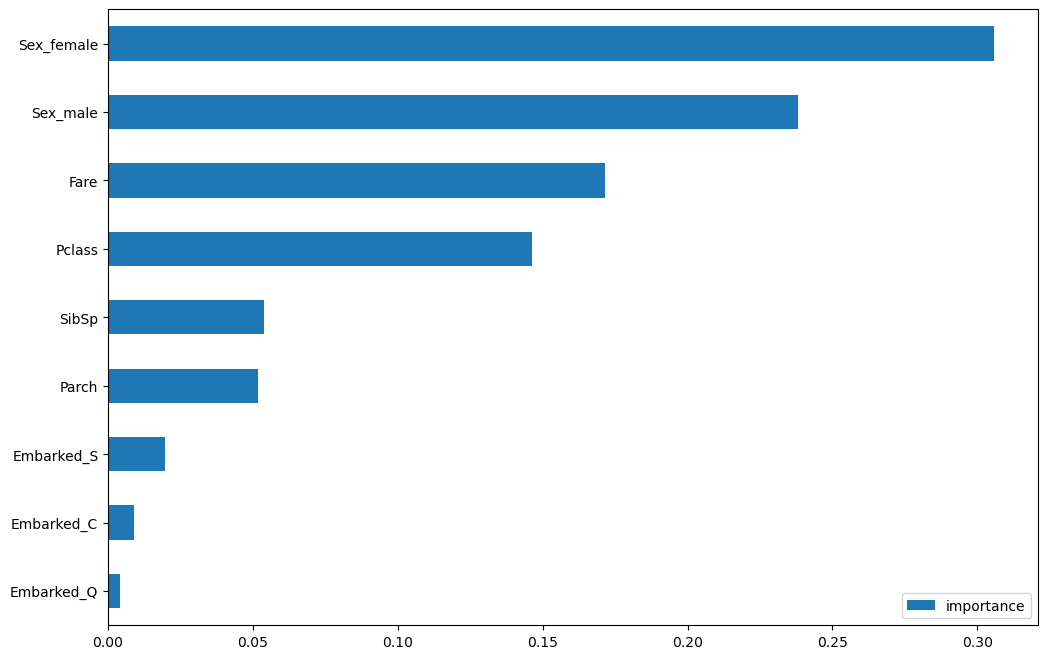

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf_rf = RandomForestClassifier()

parameters = {"n_estimators" : [1, 5, 10, 20, 30], "max_depth" : [2, 5, 7, 10, 50], "min_samples_split": [2, 10, 50]}

grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

grid_search_cv_clf.fit(x_train, y_train)


best_clf = grid_search_cv_clf.best_estimator_

print(grid_search_cv_clf.best_params_)
print()
y_pred = best_clf.predict(x_test) 

feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features' : list(x_test), 
                                       "feature_importances" : feature_importances})

print(feature_importances_df.sort_values('feature_importances', ascending=False))
print()
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

imp = pd.DataFrame(best_clf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

